# Gini and Mobility prediction

In [31]:
library(haven)
library(sdazar)
library(ggplot2)

In [4]:
dat = data.table(read_dta('../../health_inequality_project/data/cty_full_covariates.dta'))

In [6]:
dim(dat)

[1] 3138   83

In [9]:
lookvar(dat, 'rank')

In [26]:
dat = dat[complete.cases(dat[, .(gini99,s_rank)])]

In [34]:
m = lm(s_rank ~ gini99 + I(gini99^2) + I(gini99^3), data=dat)

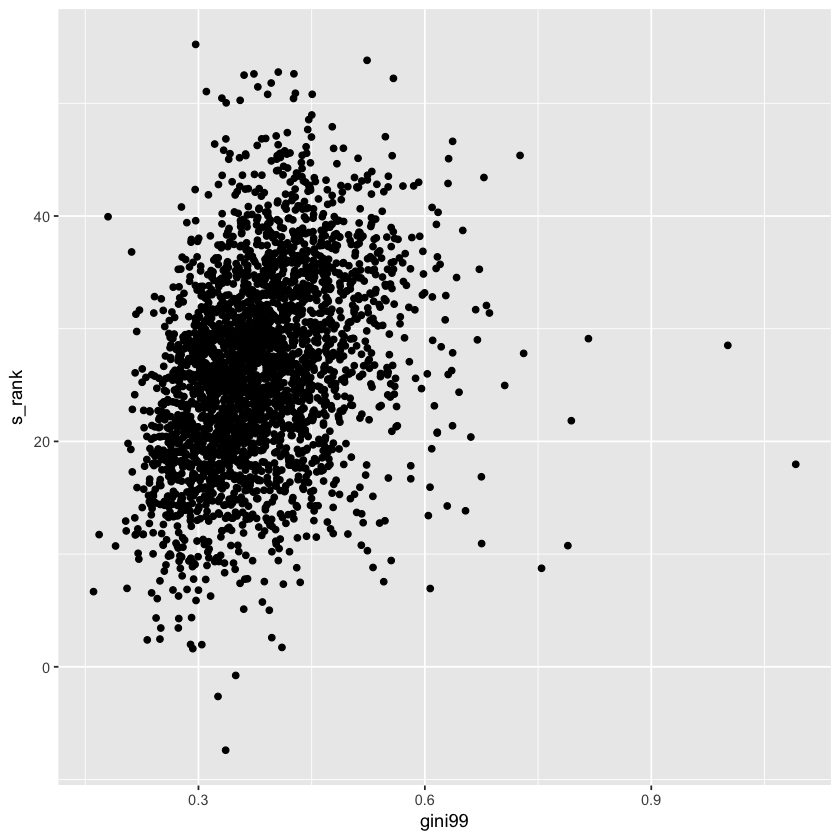

In [35]:
ggplot(data=dat, aes(x=gini99, y=s_rank)) +
    geom_point()

In [28]:
preds = predict(m)

In [36]:
summary(m)


Call:
lm(formula = s_rank ~ gini99 + I(gini99^2) + I(gini99^3), data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.637  -5.104   0.110   5.181  32.449 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -14.510      4.138  -3.507 0.000461 ***
gini99       191.270     26.610   7.188 8.35e-13 ***
I(gini99^2) -247.748     53.650  -4.618 4.05e-06 ***
I(gini99^3)   90.908     33.587   2.707 0.006837 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.923 on 2869 degrees of freedom
Multiple R-squared:  0.1521,	Adjusted R-squared:  0.1512 
F-statistic: 171.5 on 3 and 2869 DF,  p-value: < 2.2e-16


In [29]:
dat[, preds := predict(m)]

In [30]:
dat[, .(s_rank, preds, gini99)]

s_rank,preds,gini99
40.60239,27.38461,0.3799757
25.48831,30.41911,0.4897381
42.12478,30.43161,0.4906366
45.49362,28.76351,0.4170978
25.05044,25.06918,0.3330419
23.59640,29.94422,0.4621815
38.33071,30.53783,0.4988843
33.46210,29.17821,0.4308186
37.23212,28.90851,0.4217112
29.56759,28.34869,0.4047915
